In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import copy

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

color_list = [x["color"] for x in plt.rcParams["axes.prop_cycle"]]

from matplotlib.ticker import MaxNLocator

import multiprocessing
import os
import pickle
import scipy

In [3]:
from lut import *

# Loading the dataset and pre-processing

In [4]:
from mnist import load_mnist

X_train, X_test, y_train, y_test = load_mnist()

# Experiment 1

**Setup:**
- Network with 5 hidden layers of 1024 luts and 1 lut in the output layer
- Each lut takes 8 inputs

**Result:**
- Training accuracy: 0.89
- Accuracy on test set: 0.87
- Results significantly above 0.5 which would be random

In [5]:
%%time
hidden_layers = [1024] * 5
lut = Lut(bits=[8] * (len(hidden_layers) + 1), hidden_layers=hidden_layers, verbose=True)

preds_train = lut.train(X_train, y_train)
preds_test = lut.predict(X_test)
print(f"Accuracy on training set: {accuracy_score(preds_train, y_train):.2f}")
print(f"Accuracy on test set: {accuracy_score(preds_test, y_test):.2f}")

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [07:44<00:00, 92.91s/it]


Accuracy on training set: 0.89
Accuracy on test set: 0.87
CPU times: user 26.7 s, sys: 31.5 s, total: 58.2 s
Wall time: 9min 30s


In [7]:
# import pickle

# with open(r"data/lut/lut_experiment_1.pkl", "wb") as f:
#     pickle.dump(lut, f)

In [11]:
acc = lut.get_accuracies_per_layer(X_train, y_train)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [07:34<00:00, 90.88s/it]


In [13]:
# with open(r"data/lut/acc_experiment_1.pkl", "wb") as f:
#     pickle.dump(acc, f)

In [47]:
with open(r"data/lut/acc_experiment_1.pkl", "rb") as f:
    acc = pickle.load(f)

In [ ]:
acc_ = np.vstack((np.array(acc[:-1]), np.repeat(acc[-1], repeats=1024)[None, :]))
acc_mean = acc_.mean(1)
acc_std = acc_.std(1)

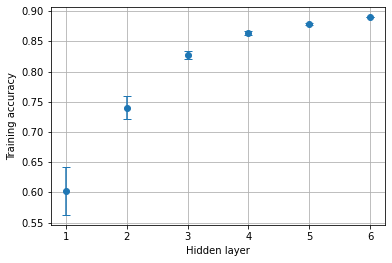

In [52]:
fig, ax = plt.subplots(1, 1)

ax.errorbar(range(1, 7), acc_mean, yerr=acc_std, capsize=4, fmt="o")
ax.set_xlabel("Hidden layer")
ax.set_ylabel("Training accuracy")
ax.grid();

In [54]:
# For latex tikz plot
for i in range(6):
    print(f"{i + 1}  0.001   {acc_mean[i]:.4f}  {acc_std[i]:.4f}")

1  0.001   0.6025  0.0399
2  0.001   0.7403  0.0186
3  0.001   0.8278  0.0069
4  0.001   0.8636  0.0035
5  0.001   0.8789  0.0016
6  0.001   0.8900  0.0000


# Majority Vote

In [5]:
bit_arr = list(range(2, 11))

In [6]:
%%time

train_no_major = []
test_no_major = []

for bit in bit_arr:
    hidden_layers = [1024] * 5
    lut = Lut(bits=[bit] * (len(hidden_layers) + 1), hidden_layers=hidden_layers, verbose=True)
    preds_train = lut.train(X_train, y_train)
    preds_test = lut.predict(X_test)

    train_acc = accuracy_score(preds_train, y_train)
    test_acc = accuracy_score(preds_test, y_test)
    train_no_major.append(train_acc)
    test_no_major.append(test_acc)
    print(f"Bits: {bit} Accuracy on training set: {train_acc:.2f}")
    print(f"Bits: {bit} Accuracy on test set: {test_acc:.2f}")

100%|█████████████████████████████████████████████| 5/5 [00:13<00:00,  2.63s/it]


Bits: 2 Accuracy on training set: 0.64
Bits: 2 Accuracy on test set: 0.65


100%|█████████████████████████████████████████████| 5/5 [00:17<00:00,  3.52s/it]


Bits: 3 Accuracy on training set: 0.76
Bits: 3 Accuracy on test set: 0.76


100%|█████████████████████████████████████████████| 5/5 [00:28<00:00,  5.76s/it]


Bits: 4 Accuracy on training set: 0.80
Bits: 4 Accuracy on test set: 0.80


100%|█████████████████████████████████████████████| 5/5 [00:51<00:00, 10.32s/it]


Bits: 5 Accuracy on training set: 0.83
Bits: 5 Accuracy on test set: 0.83


100%|█████████████████████████████████████████████| 5/5 [01:40<00:00, 20.17s/it]


Bits: 6 Accuracy on training set: 0.85
Bits: 6 Accuracy on test set: 0.84


100%|█████████████████████████████████████████████| 5/5 [03:39<00:00, 43.95s/it]


Bits: 7 Accuracy on training set: 0.87
Bits: 7 Accuracy on test set: 0.86


100%|█████████████████████████████████████████████| 5/5 [07:45<00:00, 93.16s/it]


Bits: 8 Accuracy on training set: 0.89
Bits: 8 Accuracy on test set: 0.87


100%|████████████████████████████████████████████| 5/5 [16:22<00:00, 196.58s/it]


Bits: 9 Accuracy on training set: 0.91
Bits: 9 Accuracy on test set: 0.88


100%|████████████████████████████████████████████| 5/5 [34:02<00:00, 408.54s/it]


Bits: 10 Accuracy on training set: 0.94
Bits: 10 Accuracy on test set: 0.88
CPU times: user 3min 42s, sys: 4min 53s, total: 8min 35s
Wall time: 1h 20min 3s


In [7]:
train_no_major, test_no_major

([0.642625,
  0.7604464285714285,
  0.800125,
  0.8309285714285715,
  0.8476071428571429,
  0.87025,
  0.8883928571428571,
  0.9139642857142857,
  0.9412678571428571],
 [0.6516428571428572,
  0.7632142857142857,
  0.8013571428571429,
  0.8318571428571429,
  0.8442857142857143,
  0.8598571428571429,
  0.8702142857142857,
  0.8787142857142857,
  0.8841428571428571])

In [10]:
%%time
# Foolishly wasting time by doing this loop again
# I forgot that for a majority vote, you do not need to retrain the network!

train_major = []
test_major = []

for bit in bit_arr:
    hidden_layers = [1024] * 5
    lut = Lut(bits=[bit] * (len(hidden_layers) + 1), hidden_layers=hidden_layers, verbose=True)
    _ = lut.train(X_train, y_train)
    preds_train = lut.predict(X_train, majority_vote=True)
    preds_test = lut.predict(X_test, majority_vote=True)

    train_acc = accuracy_score(preds_train, y_train)
    test_acc = accuracy_score(preds_test, y_test)
    train_major.append(train_acc)
    test_major.append(test_acc)
    print(f"Bits: {bit} Accuracy on training set: {train_acc:.2f}")
    print(f"Bits: {bit} Accuracy on test set: {test_acc:.2f}")

100%|█████████████████████████████████████████████| 5/5 [00:11<00:00,  2.30s/it]


Bits: 2 Accuracy on training set: 0.77
Bits: 2 Accuracy on test set: 0.77


100%|█████████████████████████████████████████████| 5/5 [00:17<00:00,  3.47s/it]


Bits: 3 Accuracy on training set: 0.79
Bits: 3 Accuracy on test set: 0.79


100%|█████████████████████████████████████████████| 5/5 [00:28<00:00,  5.67s/it]


Bits: 4 Accuracy on training set: 0.82
Bits: 4 Accuracy on test set: 0.82


100%|█████████████████████████████████████████████| 5/5 [00:49<00:00,  9.98s/it]


Bits: 5 Accuracy on training set: 0.83
Bits: 5 Accuracy on test set: 0.83


100%|█████████████████████████████████████████████| 5/5 [01:43<00:00, 20.66s/it]


Bits: 6 Accuracy on training set: 0.85
Bits: 6 Accuracy on test set: 0.85


100%|█████████████████████████████████████████████| 5/5 [03:38<00:00, 43.70s/it]


Bits: 7 Accuracy on training set: 0.87
Bits: 7 Accuracy on test set: 0.86


100%|█████████████████████████████████████████████| 5/5 [07:22<00:00, 88.45s/it]


Bits: 8 Accuracy on training set: 0.89
Bits: 8 Accuracy on test set: 0.88


100%|████████████████████████████████████████████| 5/5 [15:37<00:00, 187.59s/it]


Bits: 9 Accuracy on training set: 0.91
Bits: 9 Accuracy on test set: 0.88


100%|████████████████████████████████████████████| 5/5 [34:23<00:00, 412.74s/it]


Bits: 10 Accuracy on training set: 0.94
Bits: 10 Accuracy on test set: 0.90
CPU times: user 6min 29s, sys: 9min 5s, total: 15min 35s
Wall time: 2h 23min 35s


In [6]:
bit_arr = list(range(2, 11))

train_no_major = [0.64, 0.76, 0.80, 0.83, 0.85, 0.87, 0.89, 0.91, 0.94]
test_no_major = [0.65, 0.76, 0.80, 0.83, 0.84, 0.86, 0.87, 0.88, 0.88]

train_major = [0.77, 0.79, 0.82, 0.83, 0.85, 0.87, 0.89, 0.91, 0.94]
test_major = [0.77, 0.79, 0.82, 0.83, 0.85, 0.86, 0.88, 0.88, 0.90]

In [10]:
s = ""
for i in range(len(bit_arr)):
    s += f"({bit_arr[i]},{test_major[i]})"
    
s

'(2,0.77)(3,0.79)(4,0.82)(5,0.83)(6,0.85)(7,0.86)(8,0.88)(9,0.88)(10,0.9)'

# Improve mean layer accuracy

In [35]:
# max of n_samples is 70_000
X_train, X_test, y_train, y_test = load_mnist(n_samples=70_000)

In [8]:
%%time
for bt_len in [10]:
    hidden_layers = [1024] * 5
    bits = [bt_len] * (len(hidden_layers) + 1)

    params = {
        "bits": bits,
        "hidden_layers": hidden_layers,
        "improve_layer_acc": False,
        "verbose": True,
    }

    params_improve = {
        "bits": bits,
        "hidden_layers": hidden_layers,
        "improve_layer_acc": True,
        "discard_num": 50,
        "patience": 5,
        "verbose": True,
    }

    for p in [params_improve]:
        mode = "normal" if not p["improve_layer_acc"] else "improve layer acc"
        print(f"{p['bits'][0]} bits {mode}")
        lut = Lut(**p)
        preds_train = lut.train(X_train, y_train)
        acc_train = accuracy_score(preds_train, y_train)
        preds_test = lut.predict(X_test)
        acc_test = accuracy_score(preds_test, y_test)

        print(f"Accuracy on training set: {acc_train:.2f}")
        print(f"Accuracy on test set: {acc_test:.2f}")

        preds_train_major = lut.predict(X_train, majority_vote=True)
        acc_train_major = accuracy_score(preds_train_major, y_train)
        preds_test_major = lut.predict(X_test, majority_vote=True)
        acc_test_major = accuracy_score(preds_test_major, y_test)

        print(f"Accuracy on training set with majority vote: {acc_train_major:.2f}")
        print(f"Accuracy on test set with majority vote: {acc_test_major:.2f}")

        preds_train_, acc_layer = lut.get_accuracies_per_layer(X_train, y_train)

        with open(
            f"data/lut/improve_layer_acc/{p['bits'][0]:02}_{mode}_lut.pkl", "wb"
        ) as f:
            pickle.dump(
                {
                    "acc_layer": acc_layer,
                    "acc_train": acc_train,
                    "acc_test": acc_test,
                    "acc_train_major": acc_train_major,
                    "acc_test_major": acc_test_major,
                    "params": p,
                },
                f,
            )

#         np.savez(
#             f"data/lut/improve_layer_acc/{p['bits'][0]:02}_{mode}_lut",
#             cols_arr_=np.array(lut.cols_arr_, dtype="object"),
#             lut_arr_=np.array(lut.lut_arr_, dtype="object"),
#             rnd_arr_=np.array(lut.rnd_arr_, dtype="object"),
#         )

        with open(
            f"data/lut/improve_layer_acc/{p['bits'][0]:02}_{mode}_lut_npz_replace.pkl",
            "wb",
        ) as f:
            pickle.dump(
                {
                    "cols_arr_": lut.cols_arr_,
                    "lut_arr_": lut.lut_arr_,
                    "rnd_arr_": lut.rnd_arr_,
                },
                f,
            )

10 bits improve layer acc


Layer 4 Acc 0.9456: 100%|██████████████████| 5/5 [106:34:20<00:00, 76732.05s/it]


Accuracy on training set: 0.95
Accuracy on test set: 0.90
Accuracy on training set with majority vote: 0.95
Accuracy on test set with majority vote: 0.91


100%|████████████████████████████████████████████| 5/5 [32:44<00:00, 392.80s/it]


CPU times: user 6h 13min 4s, sys: 10h 38s, total: 16h 13min 42s
Wall time: 4d 11h 55min 30s


In [11]:
with open(
    f"data/lut/improve_layer_acc/08_improve layer acc_lut.pkl", "rb"
) as f:
    result = pickle.load(f)

In [12]:
acc_layer = result["acc_layer"]

In [17]:
result["acc_test"]

0.8842857142857142

In [13]:
out = r"""
\addplot+[
    hist={data=x,bins=10},
    draw=blue,
    semithick,
    pattern=north east lines,
    pattern color=blue
]
table [y expr=1] {
"""

for x in acc_layer[0]:
    out += f"{x:.4f}\n"
    
out += r"""};
        \addlegendentry{Hidden layer 1}
\addplot+[
    hist={data=x,bins=10},
    draw=red,
    semithick,
    pattern=north west lines,
    pattern color=red
    ]
            table [y expr=1] {
"""

for x in acc_layer[1]:
    out += f"{x:.4f}\n"
    
out += r"""};
        \addlegendentry{Hidden layer 2}

\addplot+[
    hist={data=x,bins=10},
    opacity=0.5,
    draw=brown,
    semithick,
    pattern=dots,
    pattern color=brown
    ]
            table [y expr=1] {
"""

for x in acc_layer[2]:
    out += f"{x:.4f}\n"
    
out += r"""};
        \addlegendentry{Hidden layer 3}

\addplot+[
    hist={data=x,bins=10},
    opacity=0.5,
    draw=gray,
    semithick,
    pattern=grid,
    pattern color=gray
    ]
            table [y expr=1] {
"""

for x in acc_layer[3]:
    out += f"{x:.4f}\n"
    
out += r"""};
        \addlegendentry{Hidden layer 4}

\addplot+[hist={data=x,bins=10}, opacity=0.5]
            table [y expr=1] {
"""

for x in acc_layer[4]:
    out += f"{x:.4f}\n"
    
out += r"""};
        \addlegendentry{Hidden layer 5}
"""

# Feature engineering

In [19]:
X_train_sobelx = np.diff(X_train, axis=1)
X_train_sobelx = np.hstack((X_train_sobelx, np.zeros((X_train.shape[0],1), dtype=bool)))

X_train_sobely = np.zeros_like(X_train)
for i in range(X_train.shape[0]):
    X_train_sobely[i] = (
        np.vstack((np.diff(X_train[i].reshape((28,28)), axis=0), np.zeros((1,28), dtype=bool)))
        .flatten()
    )

# X_train_sobel = X_train + X_train_sobelx + X_train_sobely

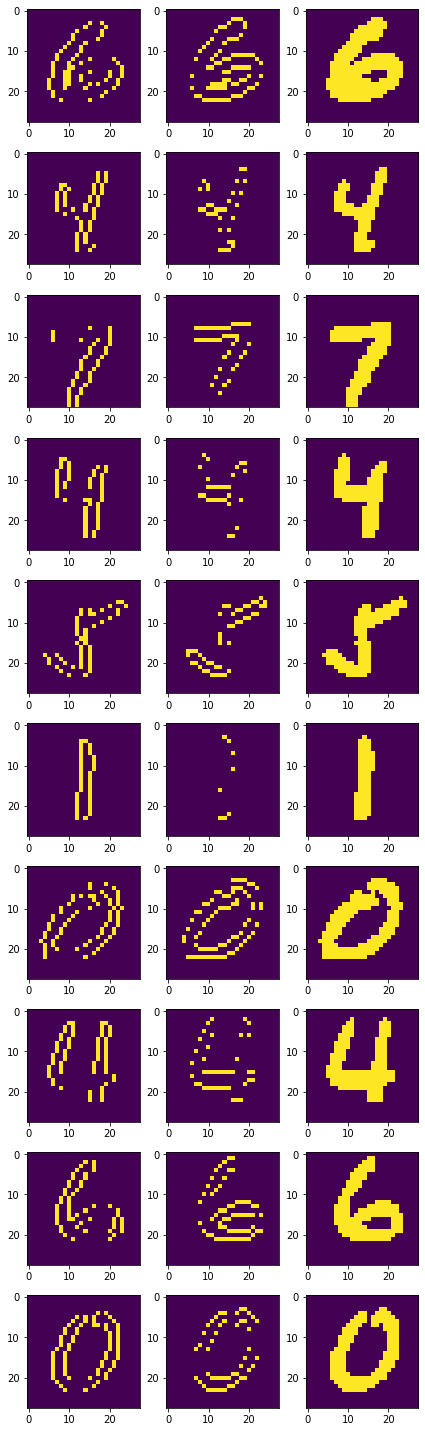

In [56]:
rows = 10
idxs = np.random.choice(range(X_train.shape[0]), rows)

fig, axs = plt.subplots(rows, 3, figsize=(6, 20))

for i, ax_row in enumerate(axs):
    ax_row[0].imshow(X_train_sobelx[idxs[i]].reshape((28,28)))
    ax_row[1].imshow(X_train_sobely[idxs[i]].reshape((28,28)))
    ax_row[2].imshow(X_train_sobel[idxs[i]].reshape((28,28)))
    
plt.tight_layout();

In [19]:
def get_sobel_dataset(dataset):
    dataset_sobelx = np.diff(dataset, axis=1)
    dataset_sobelx = np.hstack((dataset_sobelx, np.zeros((dataset.shape[0],1), dtype=bool)))

    dataset_sobely = np.zeros_like(dataset)
    for i in range(dataset.shape[0]):
        dataset_sobely[i] = (
            np.vstack((np.diff(dataset[i].reshape((28,28)), axis=0), np.zeros((1,28), dtype=bool)))
            .flatten()
        )

    dataset_sobel = dataset + dataset_sobelx + dataset_sobely
    return dataset_sobel

gsd = get_sobel_dataset

In [58]:
X_train_sobel = get_sobel_dataset(X_train)
X_test_sobel = get_sobel_dataset(X_test)

In [59]:
%%time
hidden_layers = [1024] * 5
lut = Lut(bits=[8] * (len(hidden_layers) + 1), hidden_layers=hidden_layers, verbose=True)

preds_train = lut.train(X_train_sobel, y_train)
print(f"Accuracy on training set: {accuracy_score(preds_train, y_train):.2f}")
preds_test = lut.predict(X_test_sobel)
print(f"Accuracy on test set: {accuracy_score(preds_test, y_test):.2f}")

100%|█████████████████████████████████████████████| 5/5 [07:42<00:00, 92.59s/it]


Accuracy on training set: 0.91
Accuracy on test set: 0.90
CPU times: user 25.6 s, sys: 34.6 s, total: 1min
Wall time: 8min 51s


In [60]:
%%time
X_train_ss = get_sobel_dataset(X_train_sobel)
X_test_ss = get_sobel_dataset(X_test_sobel)

hidden_layers = [1024] * 5
lut = Lut(bits=[8] * (len(hidden_layers) + 1), hidden_layers=hidden_layers, verbose=True)

preds_train = lut.train(X_train_ss, y_train)
print(f"Accuracy on training set: {accuracy_score(preds_train, y_train):.2f}")
preds_test = lut.predict(X_test_ss)
print(f"Accuracy on test set: {accuracy_score(preds_test, y_test):.2f}")

100%|█████████████████████████████████████████████| 5/5 [07:27<00:00, 89.55s/it]


Accuracy on training set: 0.92
Accuracy on test set: 0.91
CPU times: user 26 s, sys: 33.1 s, total: 59.1 s
Wall time: 8min 38s


In [62]:
%%time
X_train_ss = gsd(gsd(gsd(gsd(gsd(X_train)))))
X_test_ss = gsd(gsd(gsd(gsd(gsd(X_test)))))

hidden_layers = [1024] * 5
lut = Lut(bits=[8] * (len(hidden_layers) + 1), hidden_layers=hidden_layers, verbose=True)

preds_train = lut.train(X_train_ss, y_train)
print(f"Accuracy on training set: {accuracy_score(preds_train, y_train):.2f}")
preds_test = lut.predict(X_test_ss)
print(f"Accuracy on test set: {accuracy_score(preds_test, y_test):.2f}")

100%|█████████████████████████████████████████████| 5/5 [07:32<00:00, 90.44s/it]


Accuracy on training set: 0.91
Accuracy on test set: 0.89
CPU times: user 27.7 s, sys: 33.1 s, total: 1min
Wall time: 8min 42s


In [15]:
X_train_ss = gsd(X_train)
X_test_ss = gsd(X_test)

In [16]:
%%time
train_accs = []
test_accs = []
for bt in range(2, 11, 1):
    hidden_layers = [1024] * 5
    lut = Lut(bits=[bt] * (len(hidden_layers) + 1), hidden_layers=hidden_layers, verbose=True)
    preds_train = lut.train(X_train_ss, y_train)
    preds_test = lut.predict(X_test_ss)
    
    acc_train = accuracy_score(preds_train, y_train)
    acc_test = accuracy_score(preds_test, y_test)
    
    print(f"{bt} train: {acc_train:.2f}")
    print(f"{bt} test: {acc_test:.2f}")
    
    train_accs.append(acc_train)
    test_accs.append(acc_test)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:13<00:00,  2.63s/it]


2 train: 0.68
2 test: 0.69


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.85s/it]


3 train: 0.79
3 test: 0.79


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:30<00:00,  6.03s/it]


4 train: 0.83
4 test: 0.84


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:53<00:00, 10.69s/it]


5 train: 0.85
5 test: 0.85


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:38<00:00, 19.78s/it]


6 train: 0.88
6 test: 0.88


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [03:17<00:00, 39.49s/it]


7 train: 0.89
7 test: 0.89


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [07:14<00:00, 86.82s/it]


8 train: 0.91
8 test: 0.89


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [16:04<00:00, 192.90s/it]


9 train: 0.93
9 test: 0.91


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [35:07<00:00, 421.56s/it]


10 train: 0.96
10 test: 0.91
CPU times: user 3min 34s, sys: 4min 58s, total: 8min 33s
Wall time: 1h 15min 5s


In [18]:
"".join([f"({i+2},{test_accs[i]:.2f})" for i in range(9)])

'(2,0.69)(3,0.79)(4,0.84)(5,0.85)(6,0.88)(7,0.89)(8,0.89)(9,0.91)(10,0.91)'

In [40]:
plt.rcParams.update(
    {"text.usetex": True, "font.family": "serif", "font.serif": ["Computer Modern Roman"],}
)

In [39]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

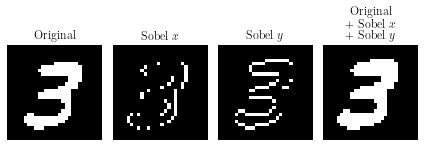

In [43]:
fig, axs = plt.subplots(1, 4)

idx = 7

axs[0].imshow(X_train[idx].reshape((28,28)), cmap="gray", interpolation="none")
axs[0].set_title("Original")
axs[1].imshow(X_train_sobelx[idx].reshape((28,28)), cmap="gray", interpolation="none")
axs[1].set_title("Sobel $x$")
axs[2].imshow(X_train_sobely[idx].reshape((28,28)), cmap="gray", interpolation="none")
axs[2].set_title("Sobel $y$")
axs[3].imshow(X_train_ss[idx].reshape((28,28)), cmap="gray", interpolation="none")
axs[3].set_title("Original\n+ Sobel $x$\n+ Sobel $y$")

for ax in axs:
    ax.axis("off")
    
plt.tight_layout()

In [44]:
fig.savefig(r"thesis/images/sobel.pdf", bbox_inches="tight")

# Boosting

**Algo**
- Train base classifier $g_0$
- Train new classifier $g_1$ on previously misclassified examples
- $g = g_0 + g_1$
- Train new classifier $g_2$ on previously misclassified examples
- Repeat $n$ times

In [23]:
%%time

hidden_layers = [1024] * 5
lut = Lut(bits=[2] * (len(hidden_layers) + 1), hidden_layers=hidden_layers, verbose=True)

preds_train = lut.train(X_train, y_train)
print(f"Accuracy on training set: {accuracy_score(preds_train, y_train):.2f}")
preds_test = lut.predict(X_test)
print(f"Accuracy on test set: {accuracy_score(preds_test, y_test):.2f}")

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:13<00:00,  2.79s/it]

Accuracy on training set: 0.65


Accuracy on test set: 0.67
CPU times: user 7.63 s, sys: 4.77 s, total: 12.4 s
Wall time: 15.7 s


In [6]:
class boostedLutClassifier:
    """
    Boosted Lut classifier
    """
    def __init__(self, bits, hidden_layers, num_lut_networks):
        self.bits = bits
        self.hidden_layers = hidden_layers
        self.num_lut_networks = num_lut_networks
        self.lut_networks_ = []
        self.alphas = []
        
    def train(self, X, y):
        weights = np.ones((X.shape[0],)) / X.shape[0]
        with tqdm(range(self.num_lut_networks - 1)) as t:
            for _ in t:
                lut = Lut(bits=self.bits, hidden_layers=self.hidden_layers)
                preds = lut.train(X, y)
                self.lut_networks_.append(lut)
                errn = np.sum(weights * (preds != y)) / np.sum(weights)
                alpha = np.log((1 - errn) / errn)
                self.alphas.append(alpha)
                weights = weights * np.exp(alpha * (preds != y))
        
    def predict(self, X):
        for idx, lut in enumerate(self.lut_networks_):
            if idx == 0:
                preds = lut.predict(X).astype(float)
                preds[preds == 0] = -1
                preds *= self.alphas[idx]
            else:
                preds_ = lut.predict(X).astype(float)
                preds_[preds_ == 0] = -1
                preds_ *= self.alphas[idx]
                preds += preds_
        preds = np.sign(preds)
        preds[preds == -1] = 0
        preds = preds.astype(int)
        return preds

In [7]:
%%time

num_trees_arr = [256, 512, 1024]

tr_accs = []
te_accs = []

for num_trees in num_trees_arr:
    hidden_layers = [1024] * 5
    bits= [2] * (len(hidden_layers) + 1)

    clf = boostedLutClassifier(bits, hidden_layers, num_trees)
    clf.train(X_train, y_train)

    preds_train = clf.predict(X_train)
    tr_acc = accuracy_score(preds_train, y_train)
    tr_accs.append(tr_acc)
    print(f"Num trees: {num_trees} Accuracy on training set: {tr_acc:.2f}")
    preds_test = clf.predict(X_test)
    te_acc = accuracy_score(preds_test, y_test)
    te_accs.append(te_acc)
    print(f"Num trees: {num_trees} Accuracy on test set: {te_acc:.2f}")

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 255/255 [52:30<00:00, 12.35s/it]


Num trees: 256 Accuracy on training set: 0.82
Num trees: 256 Accuracy on test set: 0.83


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 511/511 [1:45:27<00:00, 12.38s/it]


Num trees: 512 Accuracy on training set: 0.87
Num trees: 512 Accuracy on test set: 0.87


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1023/1023 [3:36:31<00:00, 12.70s/it]


Num trees: 1024 Accuracy on training set: 0.89
Num trees: 1024 Accuracy on test set: 0.89
CPU times: user 6h 38min 14s, sys: 3h 16min, total: 9h 54min 15s
Wall time: 11h 27min 5s


```python
num_trees_arr = [2, 4, 8, 16, 32, 64, 128]

tr_accs = [
    0.67,
    0.71,
    0.75,
    0.76,
    0.76,
    0.78,
    0.79,
]

te_accs = [
    0.69,
    0.73,
    0.75,
    0.78,
    0.77,
    0.79,
    0.80,
]
```

# Random forests

**Algo**
- For each individual tree
  - Select subset of training data

In [13]:
class randomLutClassifier:
    """
    Random forest-like lut classifier
    """
    def __init__(self, bits, hidden_layers, num_lut_networks):
        self.bits = bits
        self.hidden_layers = hidden_layers
        self.num_lut_networks = num_lut_networks
        self.lut_networks_ = []
        self.masks = []
        
    def train(self, X, y):
        with tqdm(range(self.num_lut_networks - 1)) as t:
            for _ in t:
                lut = Lut(bits=self.bits, hidden_layers=self.hidden_layers)
                mask = np.random.choice([True, False], size=X.shape[0])
                self.masks.append(mask)
                preds = lut.train(X[mask], y[mask])
                self.lut_networks_.append(lut)
        
    def predict(self, X):
        preds = []
        for idx, lut in enumerate(self.lut_networks_):
            pred = lut.predict(X)
            preds.append(pred)
                
        preds = np.apply_along_axis(scipy.stats.mode, 0, preds)[0][0]
        return preds

In [17]:
%%time

hidden_layers = [1024] * 5
clf = randomLutClassifier(bits=[8] * (len(hidden_layers) + 1), hidden_layers=hidden_layers, num_lut_networks=64)
clf.train(X_train, y_train)

preds_train = clf.predict(X_train)
print(f"Accuracy on training set: {accuracy_score(preds_train, y_train):.2f}")
preds_test = clf.predict(X_test)
print(f"Accuracy on test set: {accuracy_score(preds_test, y_test):.2f}")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 63/63 [3:30:22<00:00, 200.36s/it]


Accuracy on training set: 0.89
Accuracy on test set: 0.87
CPU times: user 40min 8s, sys: 38min 27s, total: 1h 18min 36s
Wall time: 12h 12s


# Combining different methods

In [21]:
X_train_sobel = get_sobel_dataset(X_train)
X_test_sobel = get_sobel_dataset(X_test)

In [22]:
%%time

hidden_layers = [1024] * 5
lut = Lut(
    bits=[8] * (len(hidden_layers) + 1),
    hidden_layers=hidden_layers,
    verbose=True,
    improve_layer_acc=True,
    discard_num=50,
    patience=5,
)
_ = lut.train(X_train_sobel, y_train)

preds_train = lut.predict(X_train_sobel, majority_vote=True)
print(f"Accuracy on training set: {accuracy_score(preds_train, y_train):.2f}")
preds_test = lut.predict(X_test_sobel, majority_vote=True)
print(f"Accuracy on test set: {accuracy_score(preds_test, y_test):.2f}")

Layer 4 Acc 0.9250: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [28:17:21<00:00, 20368.32s/it]


Accuracy on training set: 0.93
Accuracy on test set: 0.92
CPU times: user 3h 1min 33s, sys: 2h 32min 57s, total: 5h 34min 30s
Wall time: 1d 4h 25min 35s
